In [2]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
import shap

C:\Users\user\AppData\Local\Temp\ipykernel_37652\772614333.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
counts = pd.read_csv("C:/Users/user/OneDrive/Documents/4TH SEM/deseqnormcounts.csv")

In [37]:
counts = pd.read_csv('C:/Users/user/Downloads/2117ensemble.csv')

In [4]:
counts = counts.transpose()
counts.columns = counts.iloc[0] 
counts = counts.drop(counts.index[0])
counts = counts.astype(float)

In [5]:
sample = pd.read_csv('c:/Users/user/Downloads/clin2117.csv')

In [9]:
y =  sample['Label']
X_train, X_test, y_train, y_test = train_test_split(counts,
                                                    y,
                                                    test_size = 0.3,random_state=132)
                                                
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (130, 18482)
X_test shape (56, 18482)


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
sample['Label']=labelencoder.fit_transform(sample.iloc[:,3].values)

In [8]:
sample['Label'] = sample['Label'].apply(lambda x: 0 if x == 1 else 1)

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

#  XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=2, random_state=42)  

# train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


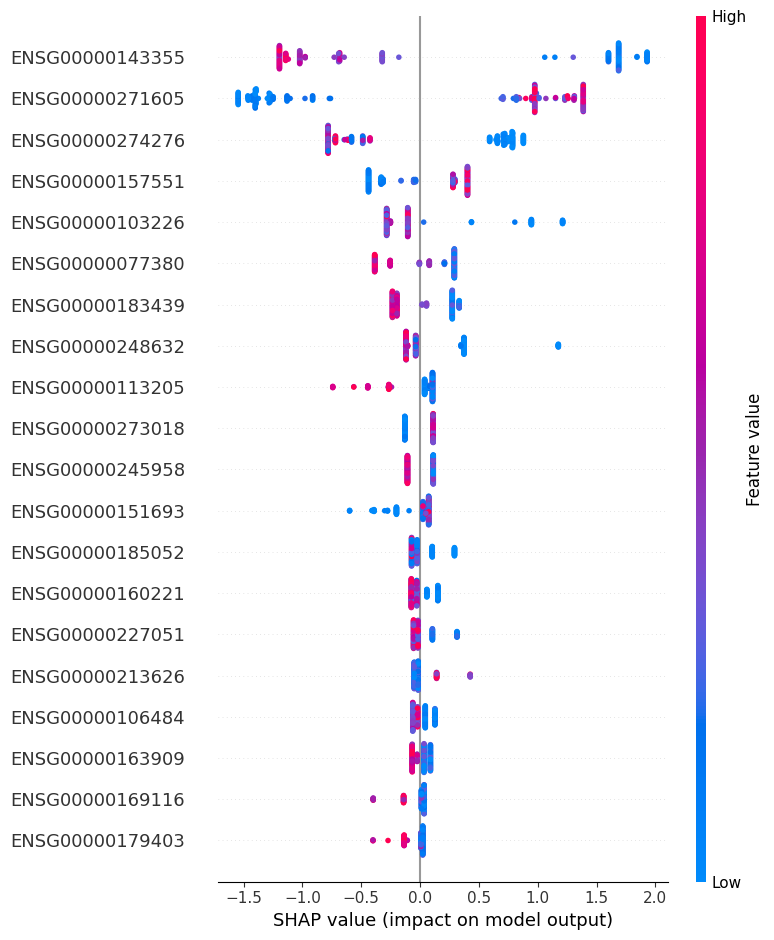

In [12]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

# train XGBoost classifier (replace X_train and y_train with whole data)
model = xgb.XGBClassifier()
model.fit(counts, y)

#  SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(model)

# calculate SHAP values for all classes
shap_values = explainer.shap_values(counts)

#  SHAP global plot
shap.summary_plot(shap_values, counts, class_names={0:'virginica', 1:'versicolor'},
 class_inds='original')


plt.show()